## Exercise 1

1.) In this first exercise, I simply used OpenCV's built-in function to convert the BGR image to HSV (cv.cvtColor()). The 

Images chosen for this exercise:


<Figure size 1440x720 with 0 Axes>

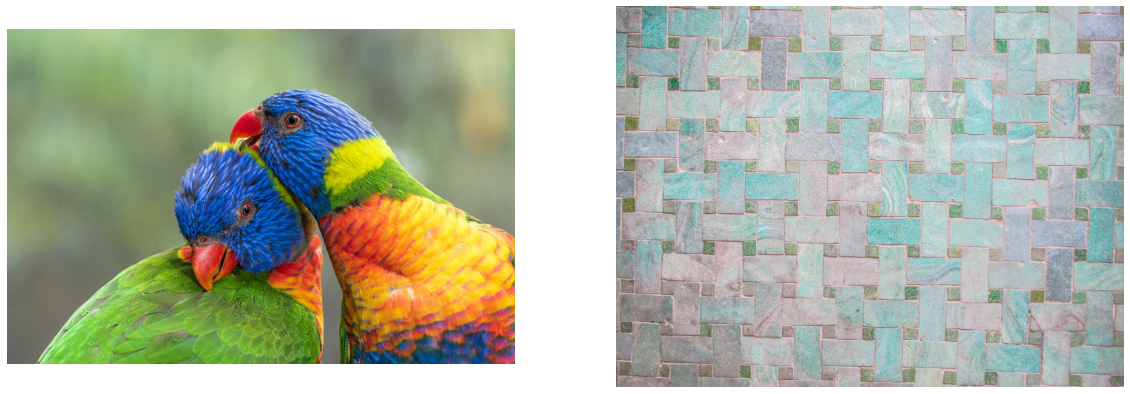

In [112]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [20, 10]

# Custom function to display images nicely using pyplot
def show_images(*images):
    plt.figure()
    if len(images) == 1:
        plt.axis('off')
        plt.imshow(images[0], vmin=0, vmax=255, cmap='gray')
    else:
        f, axarr = plt.subplots(1, len(images))

        for i, a in zip(images, axarr):
            a.axis('off')
            a.imshow(i, vmin=0, vmax=255, cmap='gray')

# Loading and converting images from BGR to RGB
birds = cv.imread('./img/birds.jpg')
birds = cv.cvtColor(birds, cv.COLOR_BGR2RGB)
stone = cv.imread('./img/stone.jpg')
stone = cv.cvtColor(stone, cv.COLOR_BGR2RGB)

# Conversion of RGB to HSV image
birds_converted = cv.cvtColor(birds, cv.COLOR_RGB2HSV)
stone_converted = cv.cvtColor(stone, cv.COLOR_RGB2HSV)

# Scaling down image to make processing faster (TO BE REMOVED LATER)
birds = cv.resize(birds, (int(birds.shape[1]/4), int(birds.shape[0]/4)))
stone = cv.resize(stone, (int(stone.shape[1]/4), int(stone.shape[0]/4)))

print("Images chosen for this exercise:")
show_images(birds, stone)

plt.show()


Images are (from left to right): original, 'I' image, 'V' image


<Figure size 1440x720 with 0 Axes>

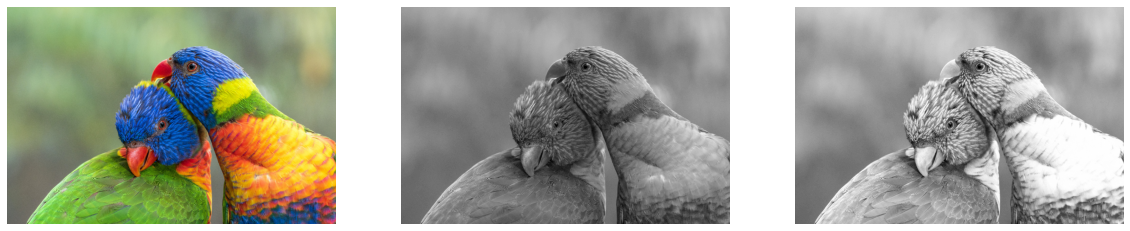

<Figure size 1440x720 with 0 Axes>

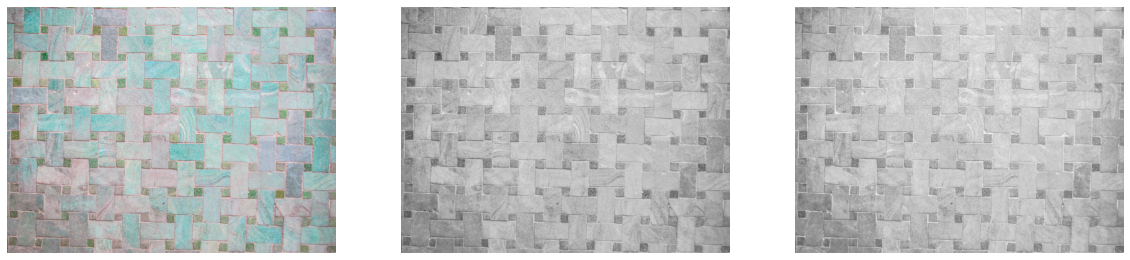

In [113]:
hsi_birds = birds.mean(axis=2)
hsv_birds = birds.max(axis=2)

hsi_stone = stone.mean(axis=2)
hsv_stone = stone.max(axis=2)

show_images(birds, hsi_birds, hsv_birds)
show_images(stone, hsi_stone, hsv_stone)

print("Images are (from left to right): original, 'I' image, 'V' image")

plt.show()

## Exercise 2

<Figure size 1440x720 with 0 Axes>

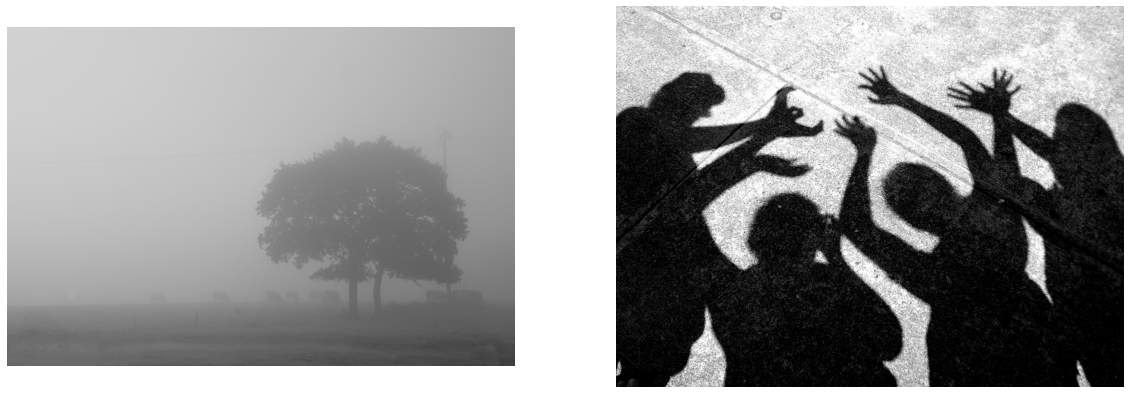

<Figure size 1440x720 with 0 Axes>

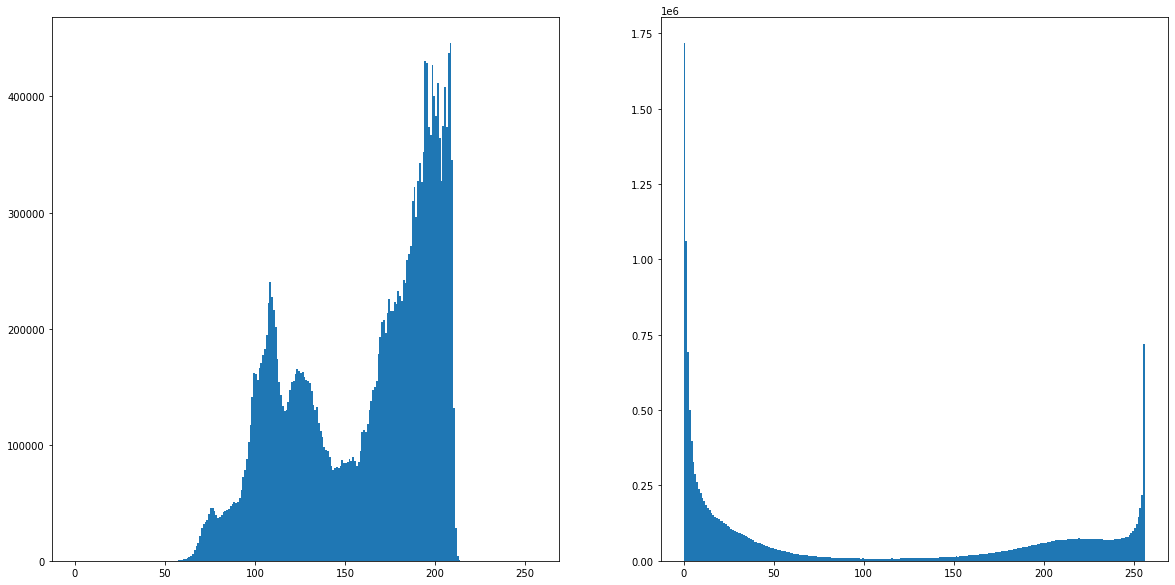

<Figure size 1440x720 with 0 Axes>

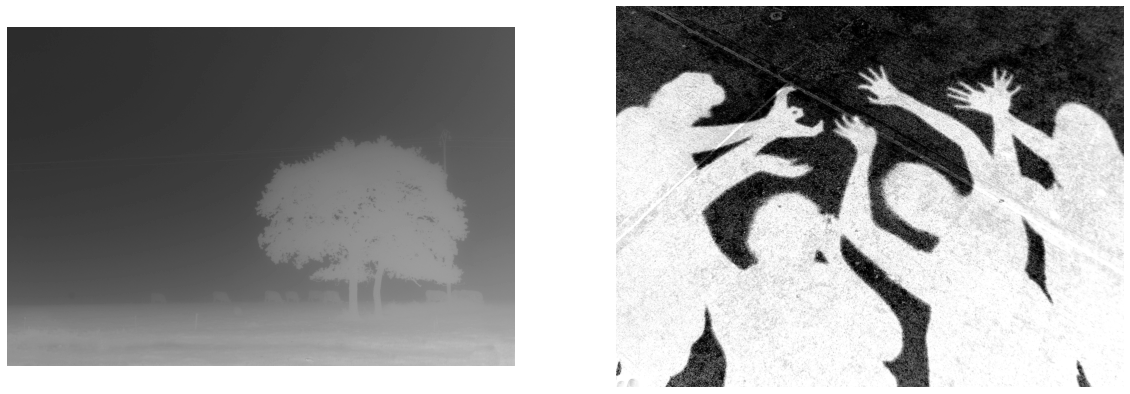

<Figure size 1440x720 with 0 Axes>

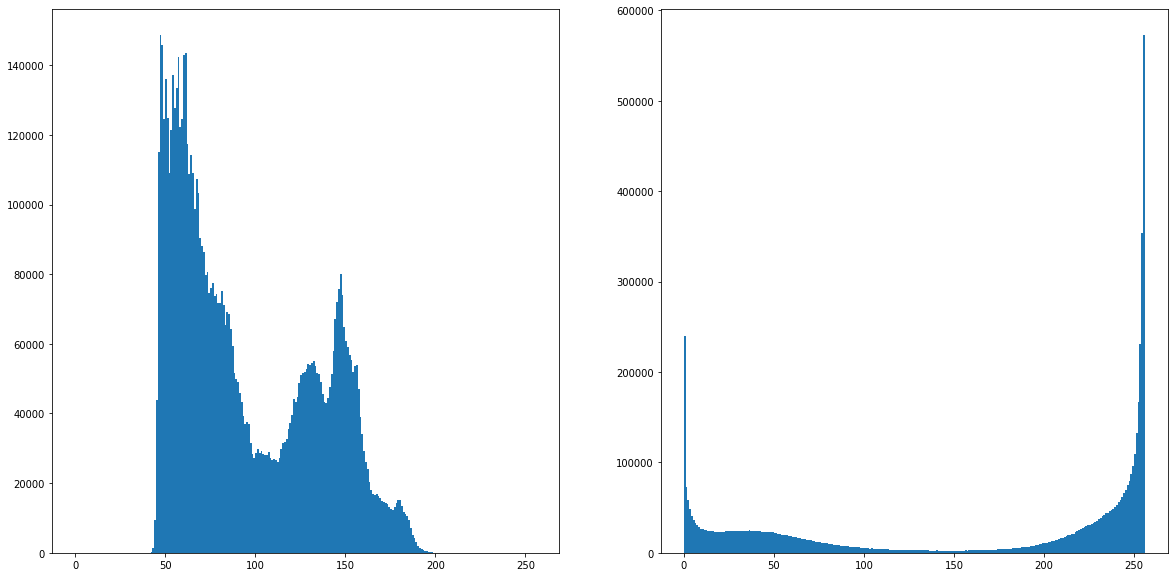

In [114]:
# Loading and converting images from BGR to RGB
fog = cv.imread('./img/fog.jpg')
fog = cv.cvtColor(fog, cv.COLOR_BGR2RGB)
shadows = cv.imread('./img/shadows.jpg')
shadows = cv.cvtColor(shadows, cv.COLOR_BGR2RGB)

show_images(fog, shadows)

# Plotting histograms for images
plt.figure()
_, (a1, a2) = plt.subplots(1, 2)
a1.hist(fog.ravel(), 256, [0, 256])
a2.hist(shadows.ravel(), 256, [0, 256])

# Use negative point-wise transform
neg_fog = 255-fog[:, :, 0]
neg_shadows = 255-shadows[:, :, 0]

show_images(neg_fog, neg_shadows)

# Plotting histograms of negative images
plt.figure()
_, (a1, a2) = plt.subplots(1, 2)
a1.hist(neg_fog.ravel(), 256, [0, 256])
a2.hist(neg_shadows.ravel(), 256, [0, 256])

plt.show()


[255 255 255]


<Figure size 1440x720 with 0 Axes>

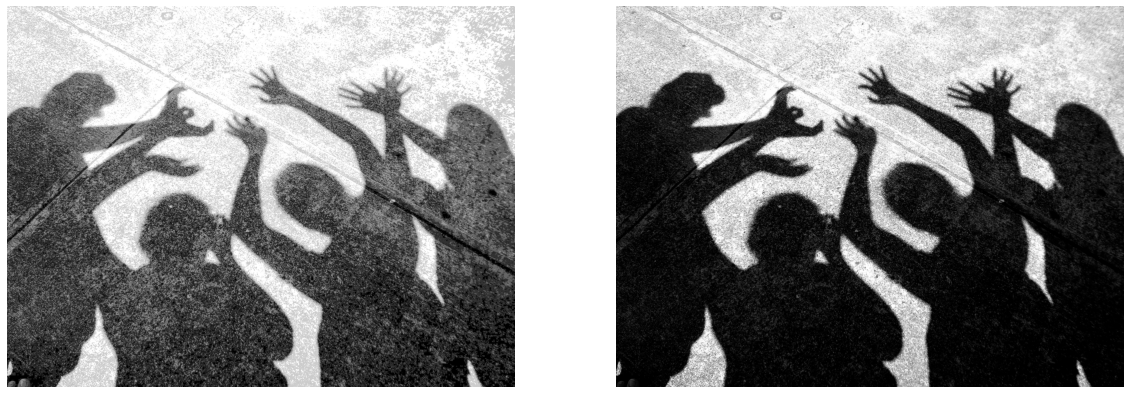

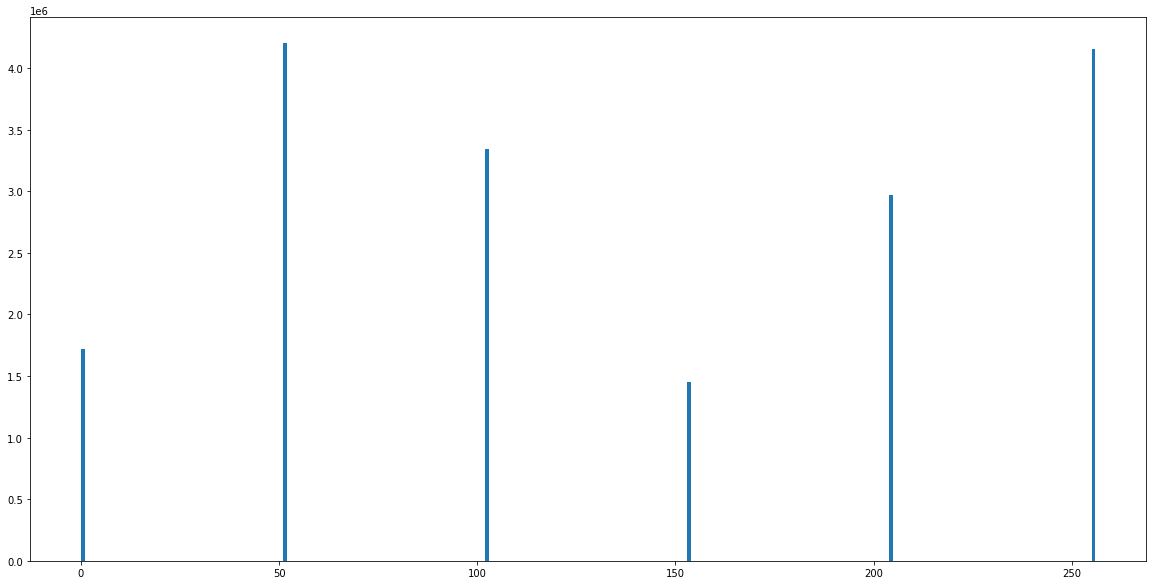

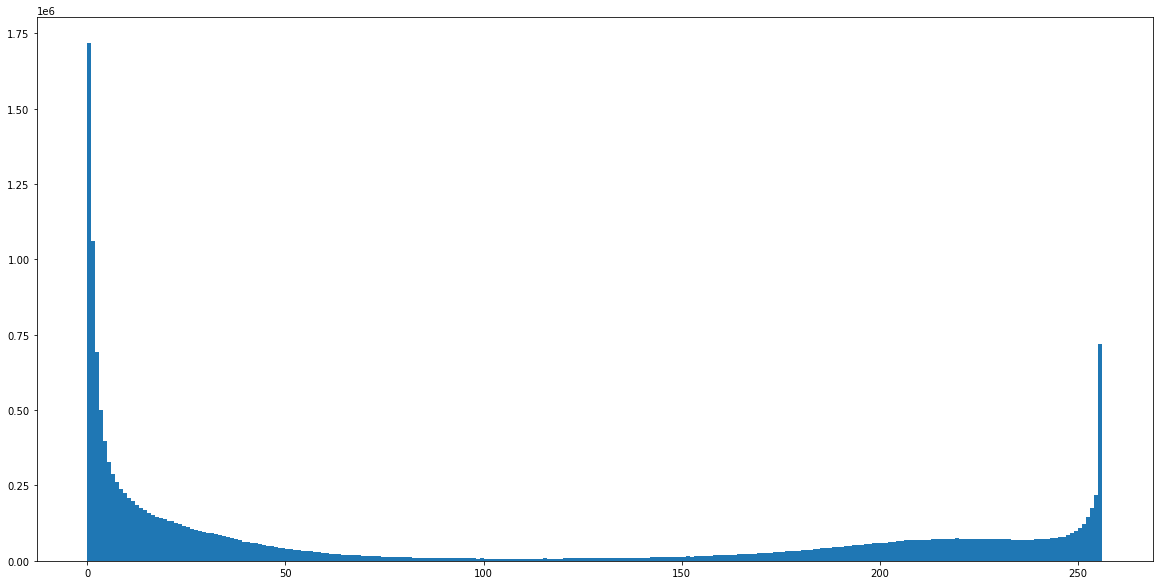

In [115]:
# Use power-rule point-wise transform
pow_shadows = shadows.copy()
n = 0.3

pow_shadows = (shadows**n).astype(int)
pow_shadows = pow_shadows*(255/np.max(pow_shadows))
pow_shadows = pow_shadows.astype(int)
print(pow_shadows[0, 0])
show_images(pow_shadows, shadows)

# Plotting histograms of power-rule images
plt.figure()
plt.hist(pow_shadows.ravel(), 256, [0, 256])
plt.figure()
plt.hist(shadows.ravel(), 256, [0, 256])

plt.show()

[0.99881725 0.99881725 0.99881725]


<Figure size 1440x720 with 0 Axes>

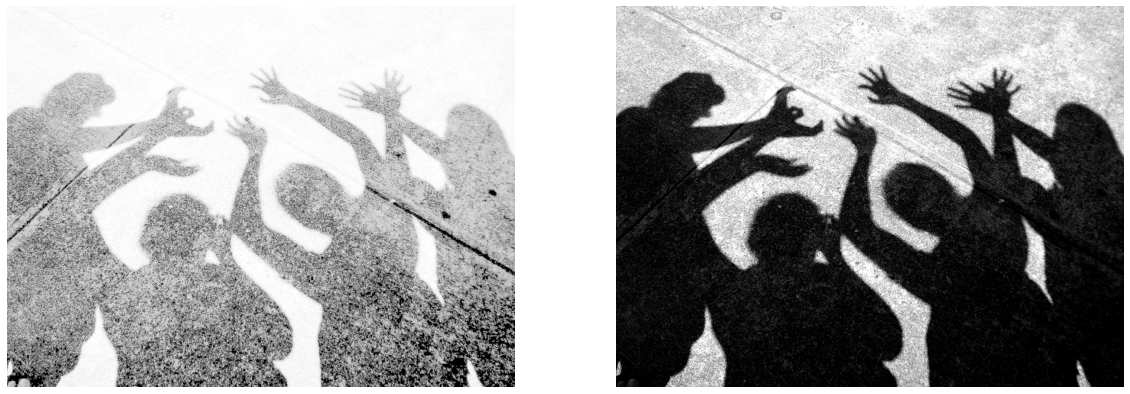

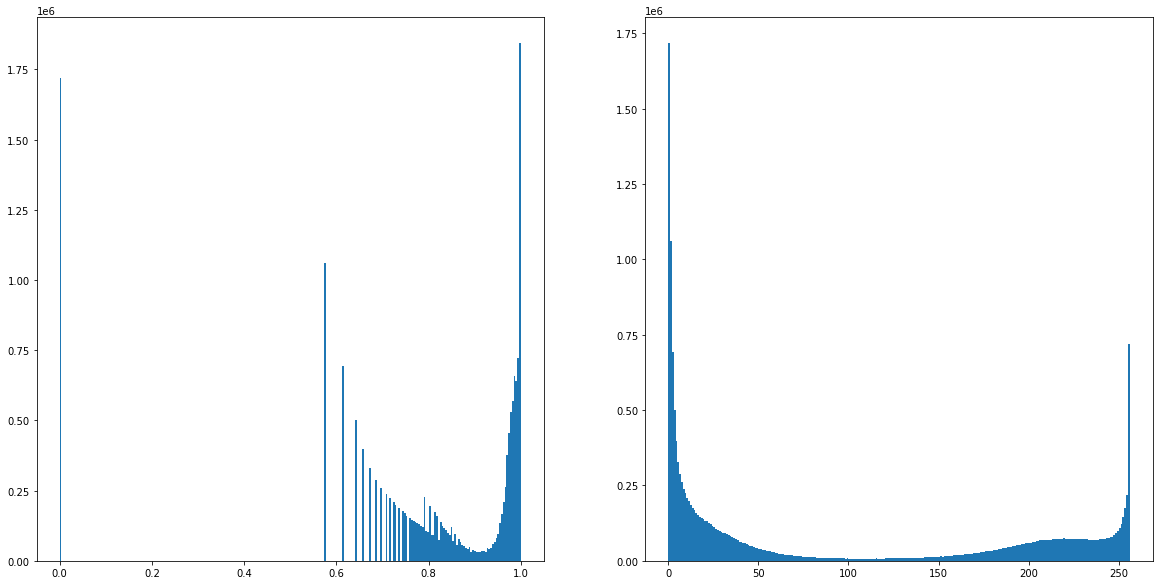

<Figure size 1440x720 with 0 Axes>

In [116]:
# Use power-rule point-wise transform
pow_shadows = shadows.copy()
n = 0.1

pow_shadows = (shadows**n)/255
pow_shadows = pow_shadows*(1/np.max(pow_shadows))
print(pow_shadows[0, 0])
show_images(pow_shadows, shadows)

# Plotting histograms of power-rule images
f, (a1, a2) = plt.subplots(1, 2)
plt.figure()
a1.hist(pow_shadows.ravel(), 256, [0, 1])
a2.hist(shadows.ravel(), 256, [0, 256])

plt.show()

<Figure size 1440x720 with 0 Axes>

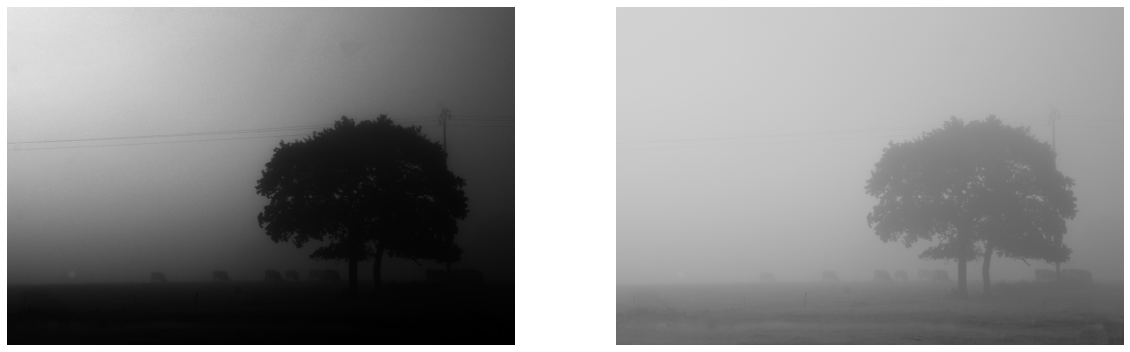

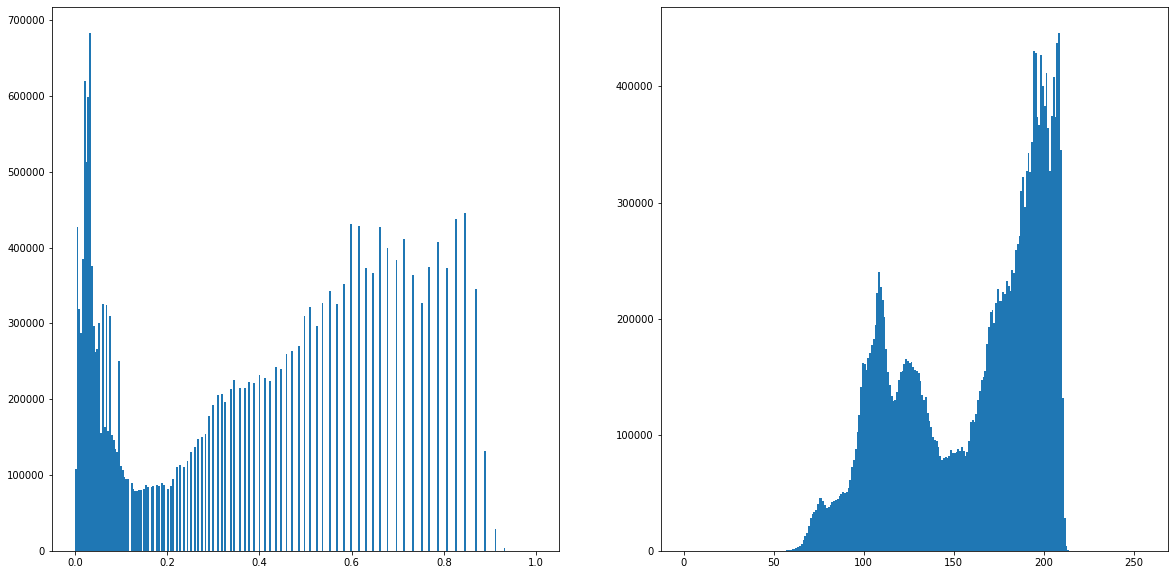

<Figure size 1440x720 with 0 Axes>

In [117]:
# Use power-rule point-wise transform
pow_fog = fog.copy()
n = 5.0

pow_fog = (fog**n)/255
pow_fog = pow_fog*(1/np.max(pow_fog))
show_images(pow_fog, fog)

# Plotting histograms of power-rule images
f, (a1, a2) = plt.subplots(1, 2)
plt.figure()
a1.hist(pow_fog.ravel(), 256, [0, 1])
a2.hist(fog.ravel(), 256, [0, 256])

plt.show()

## Exercise 3

<Figure size 1440x720 with 0 Axes>

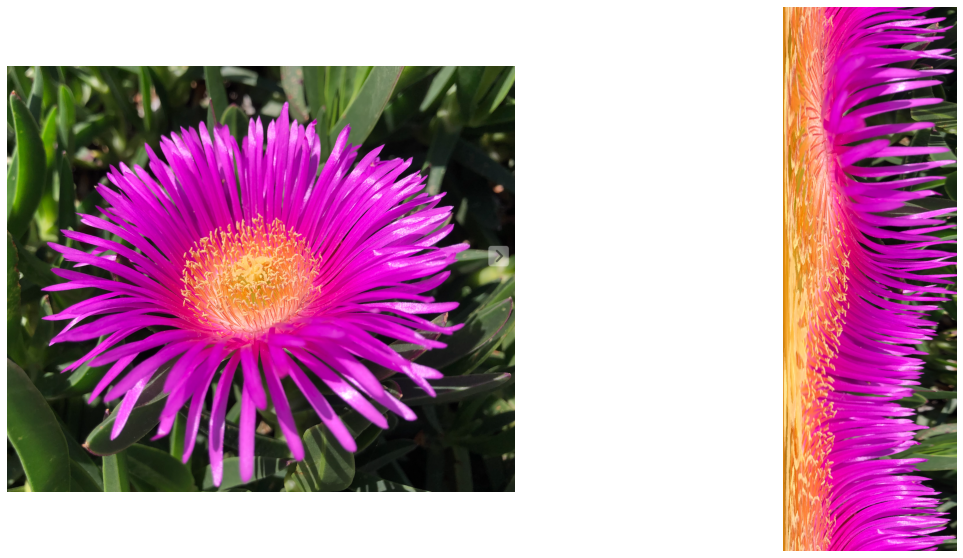

<Figure size 1440x720 with 0 Axes>

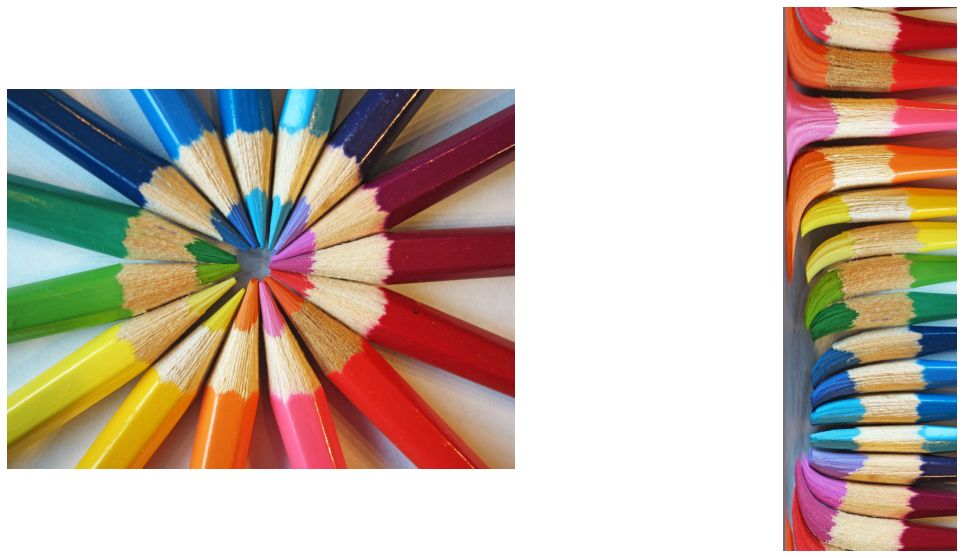

In [118]:
pink = cv.cvtColor(cv.imread('img/pink.jpg'), cv.COLOR_BGR2RGB)
crayons = cv.cvtColor(cv.imread('img/crayons.jpg'), cv.COLOR_BGR2RGB)

pink_polar = cv.warpPolar(pink, (0, 0), (pink.shape[1]/2, pink.shape[0]/2), pink.shape[0]/2, None)
crayons_polar = cv.warpPolar(crayons, (0, 0), (crayons.shape[1]/2, crayons.shape[0]/2), crayons.shape[0]/2, None)

show_images(pink, pink_polar)
show_images(crayons, crayons_polar)

<Figure size 1440x720 with 0 Axes>

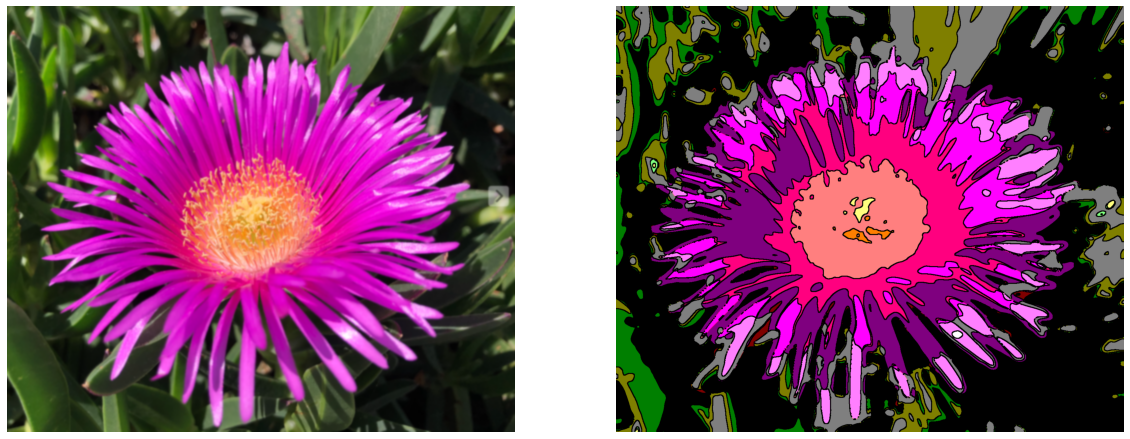

<Figure size 1440x720 with 0 Axes>

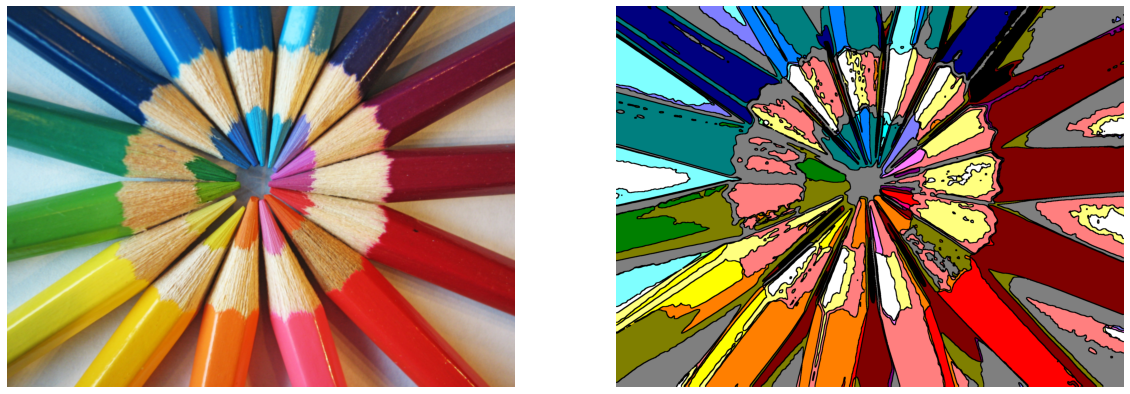

In [155]:
# Cartoonifying flower
pink_blur = cv.blur(pink, ksize=(21, 21))
n = 3.0
quant = (np.round(pink_blur*n/255)*(255/n)).astype(np.uint8)
pink_edges = cv.Canny(quant, 200, 200)
pink_edges = cv.GaussianBlur(pink_edges, ksize=(3, 3), sigmaX=1, sigmaY=1)

pink_edges[pink_edges > 0] = 255
quant[pink_edges == 255] = 0

show_images(pink, quant)

# Cartoonifying crayons
crayons_blur = cv.blur(crayons, ksize=(21, 21))
quant = (np.round(crayons_blur*n/255)*(255/n)).astype(np.uint8)
crayons_edges = cv.Canny(quant, 200, 200)
crayons_edges = cv.GaussianBlur(crayons_edges, ksize=(5, 5), sigmaX=1, sigmaY=1)

crayons_edges[crayons_edges > 0] = 255
quant[crayons_edges == 255] = 0

show_images(crayons, quant)